In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json



In [ ]:
with open("/data/yll6162/mof_cnn/data_mix_0p1bar_rotated/test/clean.json") as f:
    data1 = json.load(f)

with open("/data/yll6162/mof_cnn/data_mix_0p1bar/test/clean.json") as f:
    data2 = json.load(f)


In [9]:


def check_overlap(list1, list2):
    set1, set2 = set(list1), set(list2)

    overlap = set1 & set2  
    non_overlap_1 = set1 - set2  
    non_overlap_2 = set2 - set1  
    return overlap, non_overlap_1, non_overlap_2

overlap, non_overlap_1, non_overlap_2 = check_overlap(data1['name'], data2['name'])
print(len(overlap), len(non_overlap_2), len(non_overlap_2))

491 907 907


In [9]:
# df_iso1 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/extracted_cm3_per_cm3_values_part1.csv')
# df_iso2 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/extracted_cm3_per_cm3_values_part2.csv')
# df_iso3 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/extracted_cm3_per_cm3_values_part3.csv')
# df_iso1 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/converted_10bar_5k.csv')
# df_iso2 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/converted_10bar_qmof.csv')
# df_iso3 = pd.read_csv('/data/yll6162/mof_cnn/PSED_data/converted_8k_10bar.csv')
pressures = ['0.1bar', '0.25bar', '0.5bar', '1bar', '10bar']

file_path = '/data/yll6162/mof_cnn/PSED_data/combined_data_by_pressure_volume.xlsx'
for sheet in pressures:
    df_iso = pd.read_excel(file_path, sheet_name=sheet)
    


,project,Kr_cm3_per_cm3_value,Kr_cm3_per_cm3_error,Xe_cm3_per_cm3_value,Xe_cm3_per_cm3_error
0,f1_toc_35_1x1x1,70.296460,0.655999,111.755861,0.741911
1,f1_jus_68_1x1x1,75.673447,1.181569,118.583029,1.573870
2,f4_msw_53_1x1x1,77.124410,0.338497,94.102608,0.387917
3,f5_hea_216_1x1x1,51.007644,0.310380,44.202901,0.288415
4,f5_ssb_269_1x1x1,69.057865,0.717116,78.922142,0.873062
...,...,...,...,...,...
15934,qmof-9fd01d7,50.431590,0.335160,44.341710,0.350067
15935,qmof-e05a715,33.265228,0.214960,21.856512,0.223140
15936,qmof-92f453c,29.310696,2.244899,16.619952,2.153509
15937,qmof-424ce8c,89.051516,0.582347,122.557023,1.119970


In [7]:
df_iso

,project,Kr_cm3_per_cm3_value,Kr_cm3_per_cm3_error,Xe_cm3_per_cm3_value,Xe_cm3_per_cm3_error
0,f1_toc_35_1x1x1,21.968105,0.145037,45.545074,0.669707
1,f1_jus_68_1x1x1,19.520688,0.558390,39.775483,0.330554
2,f4_msw_53_1x1x1,6.545588,0.048030,6.104163,0.051518
3,f5_hea_216_1x1x1,5.038593,0.087883,4.116906,0.043364
4,f5_ssb_269_1x1x1,8.775253,0.167659,12.015802,0.294389
...,...,...,...,...,...
15942,qmof-9fd01d7,5.715072,0.099135,5.179809,0.061983
15943,qmof-e05a715,3.364124,0.068859,2.239603,0.029000
15944,qmof-92f453c,11.135041,0.912316,17.929968,0.925652
15945,qmof-424ce8c,21.451271,0.139641,36.696615,0.183825


In [5]:
# print(np.isnan(df_iso['Xe_cm3_per_cm3_value']).sum())
print(np.isnan(df_iso['Xe_mol_per_kg_value']).sum())


656


In [4]:
df_iso['database'] = df_iso['project'].apply(lambda x: 'qmof' if x.startswith('qmof') else 'ToBaCCo')

In [6]:
df_iso['Xe_mol_per_kg_value'].describe()

count    15283.000000
mean         1.442459
std          1.699469
min          0.000000
25%          0.306042
50%          0.777690
75%          1.996641
max         12.044995
Name: Xe_mol_per_kg_value, dtype: float64

In [ ]:
# Overlay histogram using pandas
min_value = df_iso['Xe_cm3_per_cm3_value'].min()
max_value = df_iso['Xe_cm3_per_cm3_value'].max()
# bin_edges = np.linspace(min_value, max_value, 10)
bin_edges = np.linspace(0, 190, 39)
# bar_width = 0.8 * (bin_edges[1] - bin_edges[0])
bar_width = 1 * (bin_edges[1] - bin_edges[0])
plt.figure(figsize=(15, 6))
df_iso.groupby('database')['Xe_cm3_per_cm3_value'].plot(kind='hist', bins=bin_edges, legend=True, width=bar_width, edgecolor='grey', alpha=0.6)

plt.grid(True)
plt.xlabel('Xe_cm3_per_cm3_value')
plt.ylabel('Frequency')
plt.title('Isotherms histogram grouped by database')
plt.xticks(bin_edges)

plt.show()

In [ ]:
import os
import pandas as pd
import torch
# Define the top-level directory
base_dir = "/data/yll6162/mof_cnn/PSED_data/New_Parsed_new_new/New_Parsed/" ## REPLACE WITH YOUR DIRECTORY

# Define the relative subdirectory and file names to check
subdir = "ASCI_Grids"
file_names = ["energy_grid.txt"]
abnormal_files = []
empty_files = []
absent_files = []
normal_files = []
# Loop through all subdirectories under the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    # Ensure it is a directory
    if os.path.isdir(folder_path):
        asci_grids_path = os.path.join(folder_path, subdir)
        
        # Ensure the ASCI_Grids subdirectory exists
        if os.path.exists(asci_grids_path):
            # print(f"\nProcessing ASCI_Grids in folder: {folder}")
            
            # Check for each required file
            for file_name in file_names:
                file_path = os.path.join(asci_grids_path, file_name)
                
                # Verify the file exists
                if os.path.exists(file_path):
                    # print(f"\nReading file: {file_name} in folder {folder}")
                    try:
                        # Open and print each line of the file
                        total_count = 0

                        with open(file_path, 'r') as file:
                            lines = file.readlines()
                            if len(lines) != 68921:
                                if len(lines) == 0:
                                    empty_files.append(folder)

                                # print(f"Error: {file_name} in folder {folder} has {len(lines)} lines")
                                abnormal_files.append(folder)
                                break
                            else:
                                normal_files.append(folder)
                    except Exception as e:
                        print(f"Error reading {file_name} in folder {folder}: {e}")
                else:
                    absent_files.append(folder)
                    print(f"{file_name} does not exist in folder: {folder}")
        else:
            print(f"ASCI_Grids subdirectory does not exist in folder: {folder}")

print(f"Absent energy_grid.txt files: {len(absent_files)}")
print(f"Empty energy_grid.txt files: {len(empty_files)}")
print(f"Abnormal energy_grid.txt files: {len(abnormal_files)}")
print(f"Normal energy_grid.txt files: {len(normal_files)}")


In [ ]:
for crt_mof in normal_files:
    if crt_mof in name_file['name']:
        crt_mof_index = name_file['name'].index(crt_mof)
        print(crt_mof_index, crt_mof)


#### Pick from new dataset (raw txt file)

In [2]:
import numpy as np
# mof_name = 'f1_uko_26_1x1x1'    
mof_name = 'f1_sxa_5_1x1x1'
with open(f"/data/yll6162/mof_cnn/PSED_data/New_Parsed_new_new/New_Parsed/{mof_name}/ASCI_Grids/energy_grid.txt", "r") as file:
    lines = file.readlines()  # Each line is stored as an element in the list

# Step 1: Convert list to NumPy array
data_array = np.array(lines, dtype=object)


# Step 2: Convert all valid numeric values to float while ignoring '?' entries
numeric_array = np.where(data_array != '?\n', data_array, 0).astype(float)

# Step 3: Find the maximum value, ignoring NaNs
original_max = np.nanmax(numeric_array)

# Step 4: Replace '?' with the original maximum value
cleaned_data = np.where(data_array == '?\n', original_max, data_array).astype(float)

size = 41
reshaped_array = cleaned_data.reshape((size, size, size))
assert np.isnan(reshaped_array).sum()==0

array_3d = reshaped_array

#### Pick from old dataset (cleaned numpy array)

In [ ]:
mof_index = 2332
X = np.load(f'/data/yll6162/data/train/clean.npy', mmap_mode='r')
X.shape
sample = X[mof_index]
names_json_filepath = '/data/yll6162/data/train/clean.json'
with open(names_json_filepath, "r") as file:
    name_file = json.load(file)
mof_name = name_file['name'][mof_index]
array_3d = sample
mof_name

#### Plot 3-D Array using Plotly

In [ ]:
import plotly.graph_objects as go
import numpy as np
import plotly as py
import torchvision.transforms as transforms


# Example 3D array
# array_3d = np.random.rand(10, 10, 10)
# array_3d = reshaped_array

# array_3d = sample
# Coordinates for the 3D volume
x = np.linspace(0, 40, array_3d.shape[0])
y = np.linspace(0, 40, array_3d.shape[1])
z = np.linspace(0, 40, array_3d.shape[2])
X, Y, Z = np.meshgrid(x, y, z, indexing="ij")


# Compute data range
data_min = np.min(array_3d)
data_max = np.max(array_3d)
data_cap = 0  # Cap the maximum at 500 => value>500 value show the same redness as 500



# Cap the array values above 100 to 100
capped_array_3d = np.clip(array_3d, a_min=data_min, a_max=data_cap)
# capped_array_3d = array_3d


# Compute mean and std per channel
capped_array_3d_tensor = torch.from_numpy(capped_array_3d)
mean = capped_array_3d.mean()
std = capped_array_3d.std()
normalize = transforms.Normalize(mean.squeeze().tolist(), std.squeeze().tolist())
norm_array_3d_tensor = normalize(capped_array_3d_tensor)
norm_array_3d = norm_array_3d_tensor.numpy()


# Define the custom colorscale
# custom_colorscale = [
#     [0, "blue"],                              # Minimum (negative values to blue)
#     [0.5, "white"],  # Map 0 to white
#     [1, "red"]                                # Cap all values above 100 to red
# ]

# custom_colorscale = [
#     [0, "blue"],                              # Minimum (negative values to blue)
#     [1, "white"]                                # Cap all values above 100 to red
# ]


custom_colorscale = [
    [0, "blue"],                              # Minimum (negative values to blue)
    # [0.5, "white"],  # Map 0 to white
    [1, "red"]                                # Cap all values above 100 to red
]

# custom_colorscale = [
#     [0, "blue"],                              # Minimum (negative values to blue)
#     [(0 - np.min(norm_array_3d))/(np.max(norm_array_3d) - np.min(norm_array_3d)), "white"],  # Map 0 to white
#     [1, "rgb(255, 220, 220)"]                                # Cap all values above 100 to red
# ]

# Create a 3D volume rendering
fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=array_3d.flatten(),          # Use the capped values
    isomin=np.min(array_3d),                          # Minimum value
    isomax=np.max(array_3d),                          # Maximum value capped at 100
    opacity=0.2,                              # Adjust opacity
    colorscale=custom_colorscale,             # Use custom colorscale
    surface_count=15,                          # Number of surfaces
    colorbar=dict(
        tickfont=dict(size=22)  # Adjust the font size for the tick labels
    )
))



# Update layout for larger display
fig.update_layout(
    scene=dict(
        xaxis=dict(range=[0, 40]),
        yaxis=dict(range=[0, 40]),
        zaxis=dict(range=[0, 40]),
        aspectratio=dict(x=1, y=1, z=1)  # Keep aspect ratio consistent
    ),
    width=800,  # Set figure width
    height=800,  # Set figure height
    title_text =f'MOF-{mof_name}'  
)

py.offline.plot(fig, filename=f"eda_MOF-{mof_name}.html")
fig.show()

In [ ]:
# Calculate histogram, max, and min
#  = sample
hist, bin_edges = np.histogram(array_3d, bins=20)  # Histogram with 20 bins
array_max = np.max(array_3d)  # Maximum value
array_min = np.min(array_3d)  # Minimum value

# Print the results
print("Maximum Value:", array_max)
print("Minimum Value:", array_min)
print("Histogram Bin Counts:", hist)
print("Histogram Bin Edges:", bin_edges)

# Display histogram
plt.figure(figsize=(10, 6))
plt.hist(array_3d.flatten(), bins=20, color='blue', alpha=0.7)
plt.title('Histogram of 3D Array Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Open the file and load the JSON content
import json
file_path = "/data/yll6162/data/test/clean.json"
with open(file_path, "r") as file:
    data = json.load(file)

# Print the data
print(data.keys())


In [27]:
df_iso = pd.read_excel(input_csv, sheet_name=pressure)  
df_iso

,project,Kr_cm3_per_cm3_value,Kr_cm3_per_cm3_error,Xe_cm3_per_cm3_value,Xe_cm3_per_cm3_error
0,f1_toc_35_1x1x1,2.411017,0.021720,4.757351,0.123780
1,f1_jus_68_1x1x1,3.094421,0.128280,9.541378,0.105434
2,f4_msw_53_1x1x1,0.640624,0.010218,0.573169,0.012646
3,f5_hea_216_1x1x1,0.487410,0.005285,0.405513,0.009430
4,f5_ssb_269_1x1x1,1.095662,0.033732,1.848530,0.106565
...,...,...,...,...,...
15942,qmof-9fd01d7,0.584257,0.020371,0.526239,0.015293
15943,qmof-e05a715,0.336268,0.005337,0.224341,0.005793
15944,qmof-92f453c,3.234015,0.234000,13.488654,0.483156
15945,qmof-424ce8c,2.387185,0.016071,3.874017,0.077724


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import json
import os


input_csv = '/data/yll6162/mof_cnn/PSED_data/combined_data_by_pressure_volume.xlsx'
for pressure in ['1bar']:
    # pressure = '1bar'
    target = 'Kr_cm3_per_cm3_value'
    pressure_map = {'0.1bar': '0p1bar', '1bar': '1bar', '10bar': '10bar', '0.25bar': '0p25bar', '0.5bar': '0p5bar'}
    pressure_str = pressure_map[pressure]
    ref_data_split = f'/data/yll6162/mof_cnn/data_mix_{pressure_str}'
    # Sample DataFrame
    # Function to format y-axis labels
    datset_mof = {}
    if ref_data_split and os.path.exists(ref_data_split):

        for split in ['train', 'test', 'val']:
            if os.path.exists(f'{ref_data_split}/{split}/clean.json'):
                with open(f'{ref_data_split}/{split}/clean.json', 'r') as f:
                    ref_data = json.load(f)
                    datset_mof[split] = ref_data['name']
                    # print(f"Loaded {split} files: {len(subset_files)} from original reference dataset split {len(ref_data['name'])}")


    # def thousands_formatter(x, pos):
    #     return f'{int(x/1000)}k'  # Convert 8000 to "8k", etc.

    df_iso = pd.read_excel(input_csv, sheet_name=pressure)  

    df_iso['split'] = ''
    for split in ['train', 'test', 'val']:
        if split not in datset_mof:
            continue
        df_iso.loc[df_iso['project'].isin(datset_mof[split]), 'split'] = split

    df_iso_test = df_iso[df_iso['split']=='test']
    df_iso_train = df_iso[(df_iso['split'] == 'train') | (df_iso['split'] == 'val')]

    # print(f"{pressure} test MAD {target}: ", ((df_iso_test[target] - df_iso_test[target].mean()).abs()).mean())  
    plt.figure(figsize=(8, 8))
    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Plot the distribution using Seaborn's distplot (for older versions) or histplot (for newer versions)
    # For Seaborn version >= 0.11.0, use histplot

    # Plot the distribution of Xe_cm3_per_cm3_value on the same plot

    sns.histplot(df_iso_train[target], kde=False, binwidth=1, color='red', alpha=0.5, label='train+val set')
    sns.histplot(df_iso_test[target], kde=False, binwidth=1, color='blue', alpha=0.5, label='test set')



    plt.xlim([0, 100])

    # Format y-axis labels
    # plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    # Add labels and title
    plt.xlabel('cm3_per_cm3', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.title(f'Distribution of {target} at {pressure} absorption', fontsize=18)
    plt.legend(fontsize=18)

    # Show the plot
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'  # Convert 8000 to "8k", etc.

input_csv = '/data/yll6162/mof_cnn/PSED_data/combined_data_by_pressure_volume.xlsx'

gas = 'Kr'
# Define the pressure levels
pressures = ['0.1bar', '0.25bar', '0.5bar', '1bar', '10bar']
# num_pressures = 1

for num_pressures in range(1, 6):
    # Increase font size globally
    plt.rcParams.update({'font.size': 16})  # Adjust as needed

    # Load data from multiple sheets into a single DataFrame
    df_list = []
    plt.figure(figsize=(10, 6))  # Increase figure size for better visibility

    for i in range(0, num_pressures):
        pressure = pressures[i]
        df_iso = pd.read_excel(input_csv, sheet_name=pressure)  # Change to your filename
        df_iso['Pressure'] = pressure  # Add a column for pressure level
        df_list.append(df_iso)
        
        if i == num_pressures - 1:
            sns.histplot(df_iso[f'{gas}_cm3_per_cm3_value'], kde=False, binwidth=1, alpha=1, label=pressure)
        else:
            sns.histplot(df_iso[f'{gas}_cm3_per_cm3_value'], kde=False, binwidth=1, alpha=0.25, label=pressure)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    plt.xlim([0, 100])
    plt.ylim([0, 6000])

    # Format y-axis labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Add labels and title with increased font size
    plt.xlabel('cm³ per cm³', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'Distribution of {gas} absorption at different pressure level', fontsize=15)

    # Adjust legend font size
    plt.legend(fontsize=15)

    # Save figure with high resolution
    plt.savefig(f'{gas}_{num_pressures}.png', dpi=400)

# Show the plot
# plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis labels
def thousands_formatter(x, pos):
    return f'{int(x/1000)}k'  # Convert 8000 to "8k", etc.

input_csv = '/data/yll6162/mof_cnn/PSED_data/combined_data_by_pressure_volume.xlsx'

# gas = 'Kr'
# Define the pressure levels
pressures = ['0.1bar', '0.25bar', '0.5bar', '1bar', '10bar']
# num_pressures = 1

for num_pressures in range(1, 6):
    # Increase font size globally
    plt.rcParams.update({'font.size': 16})  # Adjust as needed

    # Load data from multiple sheets into a single DataFrame
    df_list = []
    plt.figure(figsize=(10, 10))  # Increase figure size for better visibility

    for i in range(0, num_pressures):
        pressure = pressures[i]
        df_iso = pd.read_excel(input_csv, sheet_name=pressure)  # Change to your filename
        df_iso['Pressure'] = pressure  # Add a column for pressure level
        df_list.append(df_iso)
        
        if i == num_pressures - 1:
            sns.scatterplot(data=df_iso, x='Xe_cm3_per_cm3_value', y='Kr_cm3_per_cm3_value', alpha=1, label=pressure)
        else:
            sns.scatterplot(data=df_iso, x='Xe_cm3_per_cm3_value', y='Kr_cm3_per_cm3_value', alpha=0.25, label=pressure)

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # plt.xlim([0, 100])
    # plt.ylim([0, 6000])

    # Format y-axis labels
    # plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Add labels and title with increased font size
    plt.xlabel('Xe Adsorption cm³ per cm³', fontsize=15)
    plt.ylabel('Kr Adsorption cm³ per cm³', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f'Scatter plot of Xe/Kr absorption at different pressure level', fontsize=15)

    # Adjust legend font size
    plt.legend(fontsize=15)

    # Save figure with high resolution
    # plt.savefig(f'{gas}_{num_pressures}.png', dpi=400)
    plt.show()
# Show the plot
# plt.show()

<Figure size 1000x600 with 0 Axes>

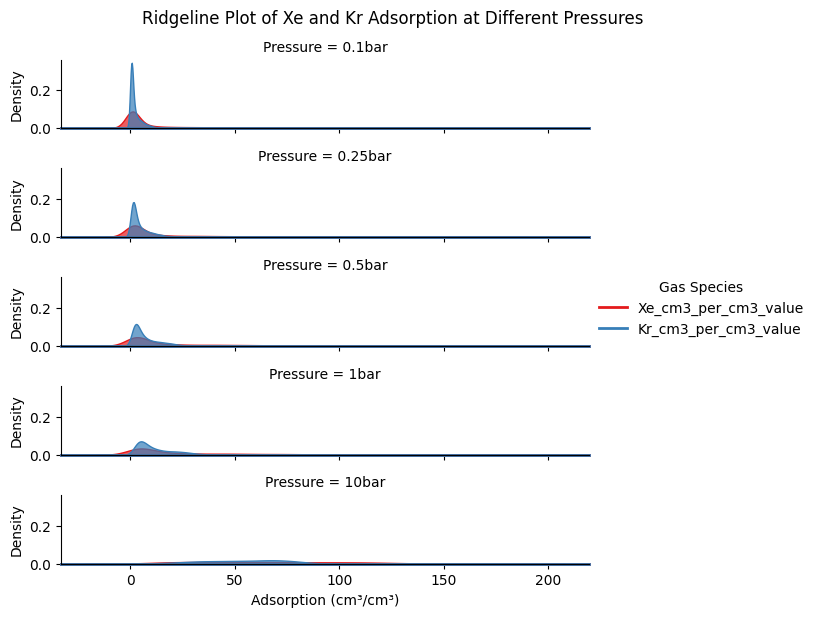

In [11]:
input_csv = '/data/yll6162/mof_cnn/PSED_data/combined_data_by_pressure_volume.xlsx'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the pressure levels
pressures = ['0.1bar', '0.25bar', '0.5bar', '1bar', '10bar']

# Load data from multiple sheets into a single DataFrame
df_list = []

for pressure in pressures:
    df_iso = pd.read_excel(input_csv, sheet_name=pressure)  # Change to your filename
    df_iso['Pressure'] = pressure  # Add a column for pressure level
    df_list.append(df_iso)

# Combine all data
df = pd.concat(df_list, ignore_index=True)

# Melt the DataFrame to have a 'Gas' column for Xe and Kr
df_long = df.melt(id_vars=['Pressure'], 
                  value_vars=['Xe_cm3_per_cm3_value', 'Kr_cm3_per_cm3_value'], 
                  var_name='Gas', 
                  value_name='Adsorption')

# Plot the ridgeline plot
plt.figure(figsize=(10, 6))

# Create a FacetGrid for the ridgeline plot, using 'Gas' for hue
rp = sns.FacetGrid(df_long, row="Pressure", hue="Gas", aspect=5, height=1.25, palette="Set1")

# Map the KDE plots for both Xe and Kr on the same grid
rp.map(sns.kdeplot, 'Adsorption', clip_on=False, fill=True, alpha=0.7, lw=1, bw_method=.2)

# Add horizontal lines at y=0
rp.map(plt.axhline, y=0, lw=2, clip_on=False)

# Add legend and labels
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle("Ridgeline Plot of Xe and Kr Adsorption at Different Pressures")
rp.set_axis_labels("Adsorption (cm³/cm³)", "Density")

# Add a legend to differentiate Xe and Kr
rp.add_legend(title="Gas Species")

plt.show()

In [9]:
df_long = df.melt(id_vars=['Pressure'], 
                  value_vars=['Xe_cm3_per_cm3_value', 'Kr_cm3_per_cm3_value'], 
                  var_name='Gas', 
                  value_name='Adsorption')
df_long

,Pressure,Gas,Adsorption
0,0.1bar,Xe_cm3_per_cm3_value,4.757351
1,0.1bar,Xe_cm3_per_cm3_value,9.541378
2,0.1bar,Xe_cm3_per_cm3_value,0.573169
3,0.1bar,Xe_cm3_per_cm3_value,0.405513
4,0.1bar,Xe_cm3_per_cm3_value,1.848530
...,...,...,...
159449,10bar,Kr_cm3_per_cm3_value,50.431590
159450,10bar,Kr_cm3_per_cm3_value,33.265228
159451,10bar,Kr_cm3_per_cm3_value,29.310696
159452,10bar,Kr_cm3_per_cm3_value,89.051516


In [3]:
import torch
import torch.nn as nn

# Define CNN with Conv3D layer
conv_layer = nn.Conv3d(in_channels=32, out_channels=64, kernel_size=3, padding=1, padding_mode='circular', bias=False)
# Create a random input tensor with shape (batch_size=1, channels=1, depth=41, height=41, width=41)
input_tensor = torch.randn(10, 32, 10, 10, 10)

# Forward pass
output_tensor = conv_layer(input_tensor)

# Print output shape
print(output_tensor.shape)  # Expected: (1, 12, 41, 41, 41)

torch.Size([10, 64, 10, 10, 10])


In [2]:
import json
subset_data = {}
for subset in ['train', 'val', 'test']:
    with open(f'sample_split_3/{subset}/clean.json', 'r') as f:
        data = json.load(f)
        subset_data[subset] = data['name']
for item in subset_data['test']:
    if item in subset_data['train'] or item in subset_data['val']:
        print(item)